In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sab
from sklearn import *
from pandas.core.dtypes.common import is_numeric_dtype

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.shape

(1338, 7)

# For Label encod with loop

In [6]:
lbl_enc=preprocessing.LabelEncoder()
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=lbl_enc.fit_transform(df[column])

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
x=df.drop('smoker',axis=1)

In [9]:
x

,age,sex,bmi,children,region,charges
0,19,0,27.900,0,3,16884.92400
1,18,1,33.770,1,2,1725.55230
2,28,1,33.000,3,2,4449.46200
3,33,1,22.705,0,1,21984.47061
4,32,1,28.880,0,1,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,2,1629.83350
1336,21,0,25.800,0,3,2007.94500


In [10]:
y=df['smoker']

In [11]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

# split train test data

In [12]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=.30,random_state=1)

In [13]:
xtrain.shape

(936, 6)

In [14]:
xtest.shape

(402, 6)

# with Api convert to decisiontreeclassifier algorithm

In [15]:
de_tree_cl=tree.DecisionTreeClassifier()

In [16]:
de_tree_cl.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [17]:
de_tree_cl.predict([[18,1,33.770,1,2,1725.55230]]) # for extarnel data result

array([0])

In [18]:
ret=de_tree_cl.score(xtest,ytest) # score in decisiontreeclassifier
print(round(ret*100),"% score predict")

96 % score predict


# find score with confusion_matrix

In [19]:
pre_res=de_tree_cl.predict(xtest)
pre_res

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [20]:
tn,fp,fn,tp=metrics.confusion_matrix(ytest,pre_res).ravel()

# find accuracy manual

In [21]:
print("This is accuracy of manual: ",(tn+tp)/(tn+tp+fp+fn)) #find accuracy manual

This is accuracy of manual:  0.9577114427860697


# find accuracy with metrics.accuracy_score

In [22]:
print("This is accuracy of metrics.accuracy_score: ",metrics.accuracy_score(ytest,pre_res)) #find accuracy with metrics.accuracy_score

This is accuracy of metrics.accuracy_score:  0.9577114427860697


# find accuracy with metrics reports

In [23]:
print(metrics.classification_report(ytest,pre_res)) #find accuracy with metrics reports

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       321
           1       0.91      0.88      0.89        81

    accuracy                           0.96       402
   macro avg       0.94      0.93      0.93       402
weighted avg       0.96      0.96      0.96       402



# find PPV accuracy Manual

In [24]:
print("This is PPV accuracy of manual: ",(tp)/(tp+fp)) #find accuracy manual

This is PPV accuracy of manual:  0.9102564102564102


# find TPR accuracy Manual

In [25]:
print("This is TPR accuracy of manual: ",(tp)/(tp+fn)) #find accuracy manual

This is TPR accuracy of manual:  0.8765432098765432


# find FPR accuracy Manual

In [26]:
print("This is FPR accuracy of manual: ",(fp)/(fp+tn)) #find accuracy manual

This is FPR accuracy of manual:  0.021806853582554516


In [27]:
ppv=(tp)/(tp+fp)
trp=(tp)/(tp+fn)

# find M1 measure accuracy Manual

In [28]:
print("This is M1 measure accuracy of manual: ",((ppv+trp)/2)) #find accuracy manual

This is M1 measure accuracy of manual:  0.8933998100664767


# find F1 score Manual

In [29]:
print("This is F1 Score manual: ",((2*ppv*trp)/(ppv+trp))) #find accuracy manual

This is F1 Score manual:  0.8930817610062893


# find TNR accuracy Manual

In [30]:
print("This is TNR Score manual: ",(tn/(tn+fp))) #find accuracy manual

This is TNR Score manual:  0.9781931464174455


# find CSI accuracy Manual

In [31]:
print("This is CSI Score manual: ",(tp/(tp+fp+fn))) #find accuracy manual

This is CSI Score manual:  0.8068181818181818


# find FDR accuracy Manual

In [32]:
print("This is FDR Score manual: ",(fp/(tp+fp))) #find accuracy manual

This is FDR Score manual:  0.08974358974358974


# visualization 

In [33]:
mat_acc=metrics.confusion_matrix(ytest,pre_res)

Text(33.0, 0.5, 'Actual Values')

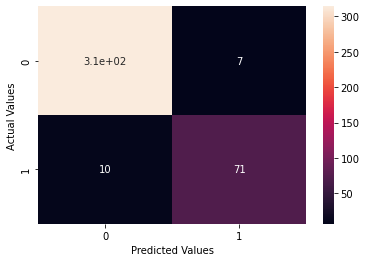

In [34]:
sab.heatmap(mat_acc,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

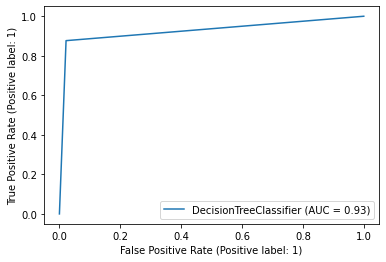

In [35]:
metrics.plot_roc_curve(de_tree_cl,xtest,ytest)